In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import pylab
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
df = pd.read_csv('stock-data/AMZN.csv')
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
df.set_index(["Date"],inplace=True)
df = df.fillna('ffill')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-06-20,35.049999,35.970001,35.040001,35.689999,35.689999,5097300
2005-06-21,35.599998,35.810001,35.279999,35.380001,35.380001,4457100
2005-06-22,35.500000,35.849998,35.139999,35.220001,35.220001,2507300
2005-06-23,35.139999,35.560001,35.099998,35.430000,35.430000,5302200
2005-06-24,35.299999,35.439999,34.880001,35.020000,35.020000,3675500


In [3]:
df['Returns'] = df['Close'].pct_change(1).mul(100)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2005-06-20,35.049999,35.970001,35.040001,35.689999,35.689999,5097300,NaN
2005-06-21,35.599998,35.810001,35.279999,35.380001,35.380001,4457100,-0.868585
2005-06-22,35.500000,35.849998,35.139999,35.220001,35.220001,2507300,-0.452233
2005-06-23,35.139999,35.560001,35.099998,35.430000,35.430000,5302200,0.596249
2005-06-24,35.299999,35.439999,34.880001,35.020000,35.020000,3675500,-1.157211


In [4]:
model_ar_1_ma_1 = ARMA(df.Returns[1:],order=(1,1))
result_ar_1_ma_1 = model_ar_1_ma_1.fit()
result_ar_1_ma_1.summary()

/home/mohsin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                Returns   No. Observations:                 3776
Model:                     ARMA(1, 1)   Log Likelihood               -8728.453
Method:                       css-mle   S.D. of innovations              2.442
Date:                Sat, 27 Jun 2020   AIC                          17464.906
Time:                        13:50:59   BIC                          17489.852
Sample:                             0   HQIC                         17473.775
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1438      0.036      4.029      0.000       0.074       0.214
ar.L1.Returns     0.7600      0.185      4.104      0.000       0.397       1.123
ma.L1.Returns    -0.7844      0.177     -4.438      0.000      -1.131      -0.438
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3158           +0.0000j            1.3158            0.0000
MA.1            1.2748           +0.0000j            1.2748            0.0000
-----------------------------------------------------------------------------
"""

In [8]:
model_ar_2_ma_2 = ARMA(df.Returns[1:],order=(2,2))
result_ar_2_ma_2 = model_ar_2_ma_2.fit()
result_ar_2_ma_2.summary()

/home/mohsin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                Returns   No. Observations:                 3776
Model:                     ARMA(2, 2)   Log Likelihood               -8725.002
Method:                       css-mle   S.D. of innovations              2.439
Date:                Sat, 27 Jun 2020   AIC                          17462.004
Time:                        14:01:26   BIC                          17499.423
Sample:                             0   HQIC                         17475.307
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1438      0.037      3.927      0.000       0.072       0.216
ar.L1.Returns    -0.1415      0.262     -0.540      0.589      -0.655       0.372
ar.L2.Returns     0.3204      0.273      1.172      0.241      -0.215       0.856
ma.L1.Returns     0.1317      0.256      0.514      0.607      -0.371       0.634
ma.L2.Returns    -0.3743      0.268     -1.398      0.162      -0.899       0.151
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5596           +0.0000j            1.5596            0.5000
AR.2            2.0011           +0.0000j            2.0011            0.0000
MA.1           -1.4680           +0.0000j            1.4680            0.5000
MA.2            1.8198           +0.0000j            1.8198            0.0000
-----------------------------------------------------------------------------
"""

## Higher order ARMA

In [7]:
model_ar_3_ma_3 = ARMA(df.Returns[1:],order=(3,3))
result_ar_3_ma_3 = model_ar_3_ma_3.fit()
result_ar_3_ma_3.summary()

/home/mohsin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                Returns   No. Observations:                 3776
Model:                     ARMA(3, 3)   Log Likelihood               -8714.587
Method:                       css-mle   S.D. of innovations              2.432
Date:                Sat, 27 Jun 2020   AIC                          17445.174
Time:                        14:00:43   BIC                          17495.065
Sample:                             0   HQIC                         17462.911
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1431      0.004     32.506      0.000       0.134       0.152
ar.L1.Returns     0.2781      0.006     44.309      0.000       0.266       0.290
ar.L2.Returns    -0.2802      0.010    -29.155      0.000      -0.299      -0.261
ar.L3.Returns     0.9822      0.008    118.796      0.000       0.966       0.998
ma.L1.Returns    -0.2929      0.008    -36.919      0.000      -0.308      -0.277
ma.L2.Returns     0.2724      0.013     20.794      0.000       0.247       0.298
ma.L3.Returns    -0.9794      0.012    -81.424      0.000      -1.003      -0.956
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0074           -0.0000j            1.0074           -0.0000
AR.2           -0.3611           -0.9382j            1.0053           -0.3085
AR.3           -0.3611           +0.9382j            1.0053            0.3085
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2           -0.3609           -0.9438j            1.0105           -0.3081
MA.3           -0.3609           +0.9438j            1.0105            0.3081
-----------------------------------------------------------------------------
"""

In [9]:
model_ar_4_ma_4 = ARMA(df.Returns[1:],order=(4,4))
result_ar_4_ma_4 = model_ar_4_ma_4.fit()
result_ar_4_ma_4.summary()

/home/mohsin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                Returns   No. Observations:                 3776
Model:                     ARMA(4, 4)   Log Likelihood               -8715.866
Method:                       css-mle   S.D. of innovations              2.433
Date:                Sat, 27 Jun 2020   AIC                          17451.732
Time:                        14:02:17   BIC                          17514.096
Sample:                             0   HQIC                         17473.903
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1438      0.036      3.973      0.000       0.073       0.215
ar.L1.Returns    -0.7319      0.278     -2.631      0.009      -1.277      -0.187
ar.L2.Returns    -0.5699      0.377     -1.511      0.131      -1.309       0.169
ar.L3.Returns     0.2914      0.365      0.798      0.425      -0.424       1.007
ar.L4.Returns     0.4307      0.300      1.437      0.151      -0.157       1.018
ma.L1.Returns     0.7221      0.271      2.662      0.008       0.190       1.254
ma.L2.Returns     0.5153      0.367      1.406      0.160      -0.203       1.234
ma.L3.Returns    -0.3222      0.352     -0.915      0.360      -1.012       0.368
ma.L4.Returns    -0.4715      0.289     -1.631      0.103      -1.038       0.095
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5386           -0.0000j            1.5386           -0.0000
AR.2           -0.3598           -0.9378j            1.0044           -0.3083
AR.3           -0.3598           +0.9378j            1.0044            0.3083
AR.4           -1.4956           -0.0000j            1.4956           -0.5000
MA.1            1.4613           -0.0000j            1.4613           -0.0000
MA.2           -0.3588           -0.9425j            1.0085           -0.3079
MA.3           -0.3588           +0.9425j            1.0085            0.3079
MA.4           -1.4269           -0.0000j            1.4269           -0.5000
-----------------------------------------------------------------------------
"""

## Tunning ARMA Model further

In [10]:
model_ar_3_ma_2 = ARMA(df.Returns[1:],order=(3,2))
result_ar_3_ma_2 = model_ar_3_ma_2.fit()
result_ar_3_ma_2.summary()

/home/mohsin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                Returns   No. Observations:                 3776
Model:                     ARMA(3, 2)   Log Likelihood               -8725.000
Method:                       css-mle   S.D. of innovations              2.439
Date:                Sat, 27 Jun 2020   AIC                          17464.000
Time:                        14:04:40   BIC                          17507.655
Sample:                             0   HQIC                         17479.520
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1438      0.037      3.919      0.000       0.072       0.216
ar.L1.Returns    -0.1969      0.896     -0.220      0.826      -1.952       1.559
ar.L2.Returns     0.3012      0.417      0.723      0.470      -0.515       1.118
ar.L3.Returns    -0.0036      0.056     -0.065      0.948      -0.114       0.106
ma.L1.Returns     0.1872      0.896      0.209      0.834      -1.568       1.943
ma.L2.Returns    -0.3559      0.404     -0.881      0.378      -1.148       0.436
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5130           +0.0000j            1.5130            0.5000
AR.2            2.2129           +0.0000j            2.2129            0.0000
AR.3           81.9482           +0.0000j           81.9482            0.0000
MA.1           -1.4337           +0.0000j            1.4337            0.5000
MA.2            1.9597           +0.0000j            1.9597            0.0000
-----------------------------------------------------------------------------
"""

In [12]:
model_ar_3_ma_1 = ARMA(df.Returns[1:],order=(3,1))
result_ar_3_ma_1 = model_ar_3_ma_1.fit()
result_ar_3_ma_1.summary()

/home/mohsin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                Returns   No. Observations:                 3776
Model:                     ARMA(3, 1)   Log Likelihood               -8725.156
Method:                       css-mle   S.D. of innovations              2.439
Date:                Sat, 27 Jun 2020   AIC                          17462.312
Time:                        14:08:25   BIC                          17499.730
Sample:                             0   HQIC                         17475.615
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1438      0.038      3.831      0.000       0.070       0.217
ar.L1.Returns    -0.8006      0.261     -3.063      0.002      -1.313      -0.288
ar.L2.Returns    -0.0610      0.021     -2.905      0.004      -0.102      -0.020
ar.L3.Returns    -0.0326      0.025     -1.303      0.193      -0.082       0.016
ma.L1.Returns     0.7912      0.261      3.035      0.002       0.280       1.302
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2884           -0.0000j            1.2884           -0.5000
AR.2           -0.2905           -4.8703j            4.8789           -0.2595
AR.3           -0.2905           +4.8703j            4.8789            0.2595
MA.1           -1.2638           +0.0000j            1.2638            0.5000
-----------------------------------------------------------------------------
"""

In [13]:
df['resid_ret_ar_ar_3_ma_3'] = result_ar_3_ma_3.resid[1:]

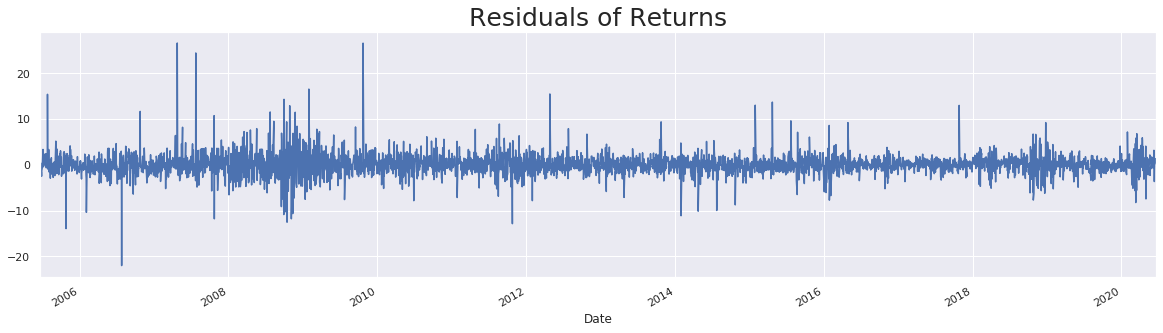

In [14]:
df['resid_ret_ar_ar_3_ma_3'].plot(figsize=(20,5))
plt.title("Residuals of Returns",size=25)
plt.show()

## ARMA For non-stationary Data

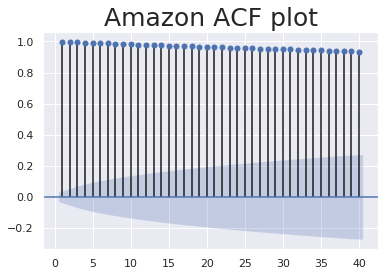

In [17]:
 sgt.plot_acf(df['Close'].iloc[1:],lags=40,zero=False)
plt.title("Amazon ACF plot",size=25)
plt.show()

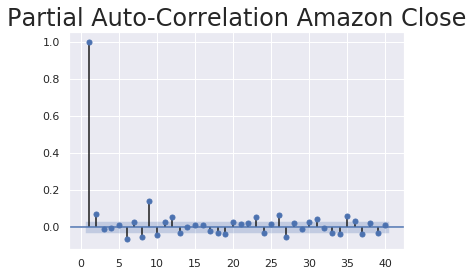

In [18]:
sgt.plot_pacf(df['Close'].tolist(),lags=40 ,zero=False,method= ('ols')) # ols = orders of least squared
plt.title("Partial Auto-Correlation Amazon Close",size=24)
plt.show()